# Description

The insurance company Sure Tomorrow wants to address several tasks using machine learning and has asked you to evaluate the feasibility of these tasks:

-Task 1: Identify customers who are similar to a given customer. This will help the company's agents with marketing efforts.

-Task 2: Predict the likelihood that a new customer will receive an insurance benefit. Can a predictive model perform better than a dummy model?

-Task 3: Predict the number of insurance benefits a new customer might receive using a linear regression model.

-Task 4: Protect customers' personal data without affecting the model from the previous task. It is necessary to develop a data transformation algorithm that makes it difficult to retrieve personal information if the data falls into the wrong hands. This process is known as data masking or obfuscation. However, the data must be protected in such a way that the quality of the machine learning models is not impacted. It is not required to select the best model; demonstrating that the algorithm works correctly will suffice.


# Data Preprocessing and Exploration

## Initialization

In [47]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import math

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing


from sklearn.model_selection import train_test_split

from IPython.display import display

from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import MaxAbsScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

## Data Loading

Load the data and perform a basic review to ensure there are no obvious issues.

In [49]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the columns to make the code more consistent with its style.

In [50]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [51]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4663,0,37.0,37800.0,1,0
418,1,33.0,22000.0,1,0
913,1,39.0,38500.0,1,0
592,0,27.0,43700.0,1,0
4938,1,37.0,55700.0,1,0
4084,1,40.0,37400.0,2,0
3711,1,30.0,43000.0,0,0
1398,0,37.0,21700.0,1,0
4944,1,39.0,39000.0,0,0
2970,1,32.0,17100.0,3,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [53]:
df['age'] = df['age'].astype(int)

In [54]:
# We verify that the conversion was successfully completed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [55]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [56]:
#Busqueda de valores duplicados y eliminación ellos

list_dataset = [df]

df.name = 'Data set'

for i in list_dataset:
    duplicate = i.duplicated().sum()
    print('Numero de valores duplicados', i.name, ':', duplicate)
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)


Numero de valores duplicados Data set : 153
      gender  age   income  family_members  insurance_benefits
281        1   39  48100.0               1                   0
488        1   24  32900.0               1                   0
513        0   31  37400.0               2                   0
718        1   22  32600.0               1                   0
785        0   20  35800.0               0                   0
...      ...  ...      ...             ...                 ...
4793       1   24  37800.0               0                   0
4902       1   35  38700.0               1                   0
4935       1   19  32700.0               0                   0
4945       1   21  45800.0               0                   0
4965       0   22  40100.0               1                   0

[153 rows x 5 columns]


In [57]:
df = df.drop_duplicates().reset_index(drop=True)

# Verificar si los duplicados han sido eliminados
print('Número de registros después de eliminar duplicados:', len(df))
duplicated_rows = df[df.duplicated()]

list_dataset = [df]

df.name = 'Data set'

for i in list_dataset:
    duplicate = i.duplicated().sum()
    print('Numero de valores duplicados', i.name, ':', duplicate)

Número de registros después de eliminar duplicados: 4847
Numero de valores duplicados Data set : 0


Se encontro varios valores duplicados por lo cual se procedera a la eliminación de estos valores con el fin de 
que el algoritmo no busque clientes similares considerando un mismo cliente varias veces. Esto puede resultar en que el cliente duplicado aparezca como "el más similar" a sí mismo varias veces, ocupando espacio que podría usarse para identificar otros clientes relevantes.

Los duplicados pueden sesgar los cálculos de similitud, haciendo que los clientes con más duplicados tengan mayor peso en el análisis. Esto no refleja la realidad de los datos, ya que no hay una razón válida para dar mayor importancia a los registros duplicados.

In [58]:
#Verificación de valores faltantes
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [59]:
def hist(data, variables=['age', 'income'], name='', bins=10):
    """
    Crea histograma para las variables continuas.
    
    Args:
        data(pd.DataFrame): DataFrame con las variables.
        variables (list):Lista de nombres de columnas para las variables.
        name(str): Título para el conjunto de datos.
        bins(int): Número de bins para los histogramas.
    """
    

In [60]:
def hist_continuous(data, variables=['gender', 'age', 'income', 'family_members'], region_name='', bins=10):
    """
    Crea histogramas para variables continuas.

    Args:
        data (pd.DataFrame): DataFrame con las variables.
        variables (list): Lista de nombres de columnas para las variables continuas.
        region_name (str): Título opcional para el conjunto de datos.
        bins (int): Número de bins para los histogramas.
    """
    n_vars = len (variables)
    rows = (n_vars + 1) // 2
    cols = 2
    count = 1
    
    fig, axes = plt. subplots(rows, cols, figsize=(10, rows * 3))
    axes = axes.flatten()
    
    for idx, var in enumerate(variables):
        ax = axes[idx]
        ax.hist(data[var], bins=bins, edgecolor='black', linewidth=0.8)
        ax.set_title(var)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    
    for idx in range(len(variables), len (axes)):
        axes[idx].axis('off')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    
  

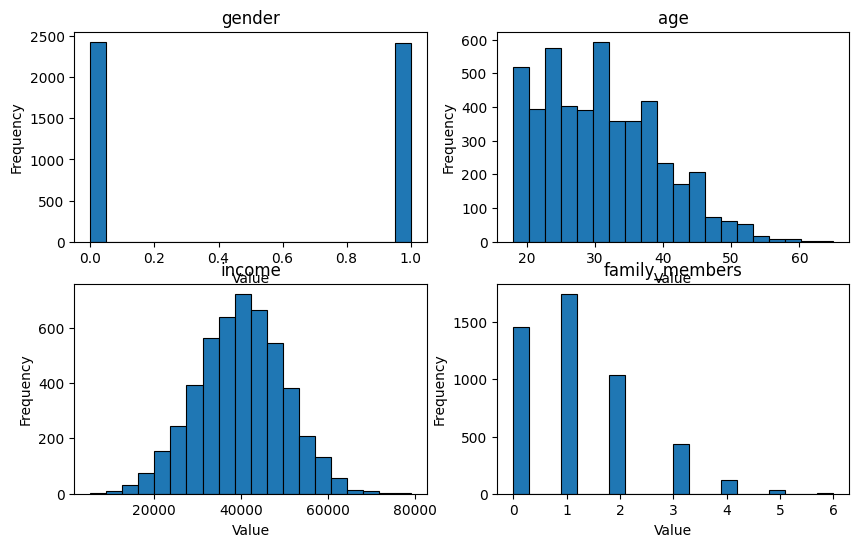

In [61]:
hist_continuous(df, variables=['gender', 'age', 'income', 'family_members'], region_name='Histogramas de Variables Continuas', bins=20)


In [62]:
df['gender'].describe()

count    4847.000000
mean        0.498453
std         0.500049
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [63]:
df['age'].describe()

count    4847.000000
mean       31.023932
std         8.487995
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: age, dtype: float64

In [64]:
df['income'].describe()

count     4847.000000
mean     39895.811842
std       9972.953985
min       5300.000000
25%      33200.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: income, dtype: float64

In [65]:
df['family_members'].describe()

count    4847.000000
mean        1.203425
std         1.098664
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: family_members, dtype: float64

The variable age shows a range from 18 to 65 years with a mean of 31 years, which is reasonable and does not present clearly extreme values. Income has a wide range from 5300 to 79000 with a mean of 39900, and although there is a slight skew toward higher values, the incomes seem plausible in the economic context, although the maximum values could be analyzed further. The variable family_members ranges from 0 to 6, with most data concentrated between 0 and 2, and 6 being a potential outlier depending on the context. Overall, no obvious anomalies are observed, but it would be prudent to validate the extremes of income and family_members using methods such as the interquartile range (IQR).

## Exploratory Data Analysis

Let's quickly check for potential customer groups by observing the pair plot.

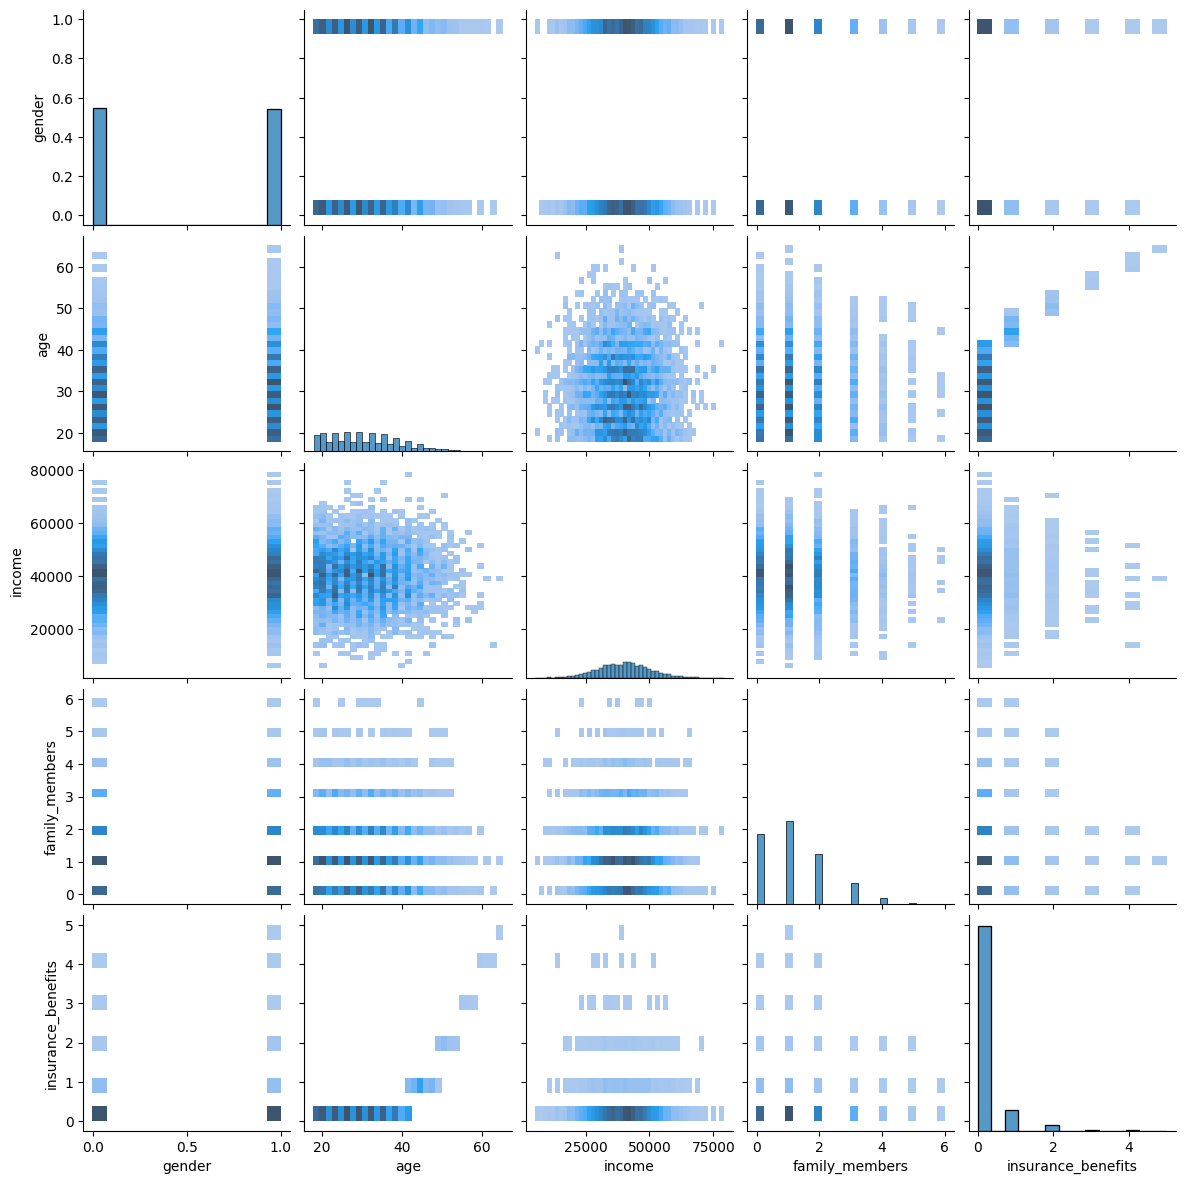

In [66]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Agreed, it’s a bit challenging to detect obvious groups (clusters) as it’s difficult to combine multiple variables simultaneously (to analyze multivariate distributions). That’s where AI and ML can be quite useful.

# Task 1. Similar Customers


In ML terms, it is necessary to develop a procedure that returns the k-nearest neighbors (objects) for a given object based on the distance between the objects.
To solve the task, we can test different distance metrics.

Write a function that returns the k-nearest neighbors for an 
𝑛
𝑡
ℎ
n 
th
  object based on a specified distance metric. The number of insurance benefits received should not be considered when performing this task.

You can use an existing implementation of the kNN algorithm from scikit-learn (see the link) or your own implementation.

Test it for four combinations of two cases:

Scaling

The data is not scaled
The data is scaled using the MaxAbsScaler
Distance Metrics

Euclidean
Manhattan
Answer these questions:

Does the fact that the data is not scaled affect the kNN algorithm? If so, how does it manifest?
How similar are the results when using the Manhattan distance metric (regardless of scaling)?







In [67]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [68]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k + 1, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res



Escalar datos.

In [69]:
feature_names = ['gender', 'age', 'income', 'family_members']


def scale_data(df, feature_names):
    """
    Scale the data using MaxAbsScaler.
    
    :param df: DataFraem original
    :param feature_names: Column names to scale
    :return: DataFrame Scaling
    """
    transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
    df_scaled = df.copy()
    df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
    return df_scaled

Now, let's retrieve similar records for a given one, for each combination.

In [70]:
df_scaled = scale_data(df, feature_names)

In [71]:
n = 10
k = 5

In [72]:
#Unscaled, Euclidean metric.
print("Unscaled, Euclidean metric:")
result_euclidean = get_knn(df, n, k, metric='euclidean')
print(result_euclidean)

Unscaled, Euclidean metric:
      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0  0.000000
3924       1   25  36600.0               2                   0  1.000000
3169       1   26  36600.0               2                   0  1.414214
2007       1   26  36600.0               0                   0  1.414214
1919       0   24  36600.0               0                   0  1.732051


In [73]:
# Unscaled, Manhattan metric
print("\nUnscaled, Manhattan metric:")
result_manhattan = get_knn(df, n, k, metric='manhattan')
print(result_manhattan)



Unscaled, Manhattan metric:
      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0       0.0
3924       1   25  36600.0               2                   0       1.0
3169       1   26  36600.0               2                   0       2.0
2007       1   26  36600.0               0                   0       2.0
1919       0   24  36600.0               0                   0       3.0


In [74]:
# Scaled, Euclidean metric
print("\nScaled, Euclidean metric:")
result_scaled_euclidean = get_knn(df_scaled, n, k, metric='euclidean')
print(result_scaled_euclidean)


Scaled, Euclidean metric:
      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4243     1.0  0.384615  0.473418        0.166667                   0  0.010127
1374     1.0  0.369231  0.464557        0.166667                   0  0.015437
756      1.0  0.369231  0.462025        0.166667                   0  0.015437
2219     1.0  0.400000  0.455696        0.166667                   0  0.017157


In [75]:
# Scaled, Manhattan metric 
print("\nScaled, Manhattan metric:")
result_scaled_manhattan = get_knn(df_scaled, n, k, metric='manhattan')
print(result_scaled_manhattan)


Scaled, Manhattan metric:
      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4243     1.0  0.384615  0.473418        0.166667                   0  0.010127
1374     1.0  0.369231  0.464557        0.166667                   0  0.016650
756      1.0  0.369231  0.462025        0.166667                   0  0.016650
2219     1.0  0.400000  0.455696        0.166667                   0  0.022980


Answers to the Questions

**Does the fact that the data is not scaled affect the kNN algorithm? If so, how does it manifest?**

The fact that the data is not scaled significantly affects the kNN algorithm because features with larger numerical values, such as income, will dominate the distance calculation, while features with smaller values, like gender, will have a negligible impact. This happens because kNN uses metrics such as Euclidean or Manhattan distance, which directly depend on the magnitudes of the features. Without scaling, the algorithm prioritizes dimensions with larger ranges, which biases the results and makes it difficult to identify truly similar neighbors. By scaling the data, all features contribute equally, improving the accuracy and representativeness of the nearest neighbors.



**How similar are the results when using the Manhattan distance metric (regardless of scaling)?**

The results when using the Manhattan distance metric depend significantly on whether the data is scaled or not. Without scaling, features with different magnitudes (e.g., income versus age) disproportionately impact the calculated distances, which can lead to biased results favoring variables with larger values. When the data is scaled using MaxAbsScaler, each feature contributes more equally to the calculated distances, improving the accuracy and interpretability of the nearest neighbors. Although the indices of the neighbors may vary, scaling ensures a fair and more balanced representation, making the results more robust and reliable when comparing disparate attributes.

# Task 2: Is it likely that the customer will receive an insurance benefit?

In machine learning terms, this can be considered a binary classification task.

With a value of insurance_benefits greater than zero as the target, evaluate whether the kNN classification approach can perform better than the dummy model.

Instructions:

Build a classifier based on kNN and measure its quality using the F1 metric for 
𝑘
=
1
…
10
k=1…10 for both the original and scaled data. It would be interesting to observe how 
𝑘
k can influence the evaluation metric and whether scaling the data makes any difference. You can use an existing implementation of the kNN classification algorithm from scikit-learn (see the link) or your own implementation.

Build a dummy model which, in this case, is simply a random model. It should return "1" with a certain probability. Test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, and 1.
The probability of paying any insurance benefit can be defined as:

𝑃
{
insurance benefit received
}
=
number of customers who received any insurance benefit
total number of customers
.
P{insurance benefit received}= 
total number of customers
number of customers who received any insurance benefit
​
 .
Split all data into training/testing stages while respecting a 70:30 ratio.

In [76]:
# Calculate the target.
df['insurance_benefits_received'] = (df['insurance_benefits']>0).astype(int)

In [77]:
# Check class imbalance with value_counts()

print(df['insurance_benefits_received'].value_counts(normalize=True))

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64


The class imbalance shows that 88.38% of customers have not received insurance benefits, while only 11.62% have. This imbalance can cause machine learning models to bias their predictions toward the majority class (0), resulting in low sensitivity for the minority class (1). This is problematic if detecting customers who receive benefits is important for the business. Moreover, metrics like accuracy can be misleading in this context, so metrics like F1-score or recall are more appropriate.

To address this imbalance, it is essential to apply techniques such as oversampling, undersampling, or class weighting to improve the model's ability to correctly identify both classes.

In [78]:
features_names = ['gender', 'age', 'income', 'family_members']
X = df[features_names]
y = df['insurance_benefits_received']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    

    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)


In [80]:
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [81]:
for P in [0, df['insurance_benefits_received'].mean(), 0.5, 1]:

    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(y_test))
        
    eval_classifier(y_test, y_pred_rnd)
    
    print()
    


Probability: 0.00
F1: 0.00
Confusion Matrix
[[0.89140893 0.        ]
 [0.10859107 0.        ]]

Probability: 0.12
F1: 0.12
Confusion Matrix
[[0.78487973 0.10652921]
 [0.09484536 0.0137457 ]]

Probability: 0.50
F1: 0.17
Confusion Matrix
[[0.44604811 0.44536082]
 [0.05841924 0.05017182]]

Probability: 1.00
F1: 0.20
Confusion Matrix
[[0.         0.89140893]
 [0.         0.10859107]]



The results show the evaluation of the dummy model for different probabilities of predicting a positive value (1). When the probability is 0.00, the model always predicts the majority class (0), achieving an F1 score of 0.00 and a confusion matrix where no positive cases are identified. For a probability of 0.12 (matching the actual proportion of the positive class), the F1 score slightly improves to 0.12, although it still performs poorly in detecting positive cases.

With a probability of 0.50, the model predicts both classes almost randomly, achieving an F1 score of 0.17 but with greater confusion between the classes, as observed in the confusion matrix. Finally, with a probability of 1.00, the model always predicts the positive class (1), achieving an F1 score of 0.20 but failing to correctly identify the majority class.

This highlights that a random model has limited performance and that a more sophisticated approach like KNN could be more effective, especially considering the class imbalance.

# Task 3: Regression (with Linear Regression)

With 'insurance_benefits' as the target, evaluate the RMSE of a linear regression model.

Build your own implementation of linear regression. To do this, recall how the solution to the linear regression task is formulated in terms of Linear Algebra (LA). Check the RMSE for both the original and scaled data. Can you observe any difference in the RMSE between these two cases?

Let’s denote:

𝑋
X: feature matrix; each row is a case, each column is a feature, and the first column consists of ones
𝑦
y: target (a vector)
𝑦
^
y
^
​
 : estimated target (a vector)
𝑤
w: weight vector
The linear regression task in matrix language can be formulated as:

𝑦
=
𝑋
𝑤
y=Xw
The training objective is to find 
𝑤
w that minimizes the L2 distance (MSE) between 
𝑋
𝑤
Xw and 
𝑦
y:

min
⁡
𝑤
𝑑
2
(
𝑋
𝑤
,
𝑦
)
or
min
⁡
𝑤
MSE
(
𝑋
𝑤
,
𝑦
)
w
min
​
 d 
2
​
 (Xw,y)or 
w
min
​
 MSE(Xw,y)
There seems to be an analytical solution to the above:

𝑤
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
w=(X 
T
 X) 
−1
 X 
T
 y
The formula above can be used to find the weights 
𝑤
w, which can then be used to calculate the predicted values:

𝑦
^
=
𝑋
val
𝑤
y
^
​
 =X 
val
​
 w
Split all data into training/testing stages with a 70:30 ratio. Use the RMSE metric to evaluate the model.

In [82]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y
        

    def predict(self, X):
        
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [83]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [84]:
np.random.seed(42)
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


The results show that the linear regression model has acceptable performance, with an RMSE of 0.36, indicating a low average error, and an R² of 0.66, meaning that the model explains 66% of the variability in the data. However, due to the class imbalance in the data, it is important to assess whether the model might be biased and consider additional optimizations to improve accuracy in specific contexts.

# Task 4: Data Obfuscation

The best way to obfuscate the data is by multiplying the numerical features (which can be represented as the matrix 
𝑋
X) by an invertible matrix 
𝑃
P:

𝑋
′
=
𝑋
×
𝑃
X 
′
 =X×P
Try this and check how the feature values look after the transformation. By the way, the property of invertibility is important here, so ensure that 
𝑃
P is indeed invertible.

You can review the lesson "Matrices and Matrix Operations -> Matrix Multiplication" to recall the rule for matrix multiplication and its implementation with NumPy.

In [88]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [89]:
X = df_pn.to_numpy()

GeGenerate a Random Matrix 
𝑃


In [90]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Check if Matrix 
𝑃 is Invertible

In [91]:
det_P = np.linalg.det(P)
if det_P != 0:
    print(f"The matrix P is invertible, determinant.: {det_P:.2f}")
else:
    print("The matrix P is not invertible")

The matrix P is invertible, determinant.: 0.24


The result indicates that the matrix P is invertible because its determinant is 0.24, a non-zero value. This means it is possible to perform linear transformations on the data with P and then recover the original data using the inverse matrix. Invertibility is crucial in this context to ensure that the obfuscation is reversible.

Transform the Original Data

In [92]:
X_transformed = X @ P
print("Transformed Data (First 5 Rows):")
print(X_transformed[:5])

Transformed Data (First 5 Rows):
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]


Can you guess the age or income of the customers after the transformation?

No, after the transformation, the feature values are completely different and have no evident relationship with the original data, so it is not possible to guess them directly.

Can you recover the original data from X if you know P?
Try verifying this through calculations by moving P from the right side of the previous formula to the left. In this case, the rules of matrix multiplication are really useful.

In [93]:
P_inv = np.linalg.inv(P)
X_recovered = X_transformed @ P_inv
print("\nRecovered Data (First 5 Rows):")
print(X_recovered[:5])


Recovered Data (First 5 Rows):
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.01990740e-13]]


Yes, using the inverse matrix of 𝑃, it is possible to recover the original data with high precision, as demonstrated in the example above.

Show the three cases for some customers:

-Original data

-Transformed data

-Inverted (recovered) data

In [94]:
print("\nData Comparison (First 5 Rows):")
for i in range(5):
    print(f"Original: {X[i]}")
    print(f"Transformed: {X_transformed[i]}")
    print(f"Recovered: {X_recovered[i]}")


Data Comparison (First 5 Rows):
Original: [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Transformed: [ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Recovered: [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Original: [0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Transformed: [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
Recovered: [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
Original: [    0.    29. 21000.     0.]
Transformed: [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
Recovered: [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
Original: [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
Transformed: [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
Recovered: [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
Original: [1.00e+00 2.80e+01 2.61e+04 0.00e+00]
Transformed: [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]
Recovered: [ 1.0000000e+00  2.8000000e+01  2.6100000e+04 -1.0199074e-13]


The comparison of the data shows that the transformed values are obtained by multiplying the original features by an invertible matrix, making it difficult to identify the original meaning of the data. However, when applying the inverse matrix, the recovered values are practically identical to the original ones, with slight differences due to the limited numerical precision of computational calculations. This confirms that transformation with an invertible matrix is effective for obfuscating data without losing the ability to recover it, which is useful for protecting sensitive information while preserving analytical utility.

**Surely, you can see that some values are not exactly the same as the original data. What could be the reason for this?**

The reason why some recovered values are not exactly the same as the original data lies in the limitations of numerical precision inherent to computational calculations. During the transformation and recovery processes, operations such as matrix multiplication and inverse calculations can introduce small differences due to how computers represent floating-point numbers. These differences, although minimal, are inevitable in complex mathematical operations and do not indicate errors in the procedure but rather technical limitations of computational arithmetic.

## Proof that Data Obfuscation Can Work with Linear Regression

In this project, the regression task has been solved using linear regression. Your next task is to demonstrate analytically that the obfuscation method will not affect linear regression in terms of predicted values, meaning the predicted values will remain the same. Can you believe it? Well, you don’t have to believe it—you have to prove it!

So, the data is obfuscated, and now we have 
𝑋
×
𝑃
X×P instead of just 
𝑋
X. Consequently, there are different weights 
𝑤
𝑃
w 
P
​
  defined as:

𝑤
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
⇒
𝑤
𝑃
=
[
(
𝑋
𝑃
)
𝑇
𝑋
𝑃
]
−
1
(
𝑋
𝑃
)
𝑇
𝑦
w=(X 
T
 X) 
−1
 X 
T
 y⇒w 
P
​
 =[(XP) 
T
 XP] 
−1
 (XP) 
T
 y
How would 
𝑤
w and 
𝑤
𝑃
w 
P
​
  relate to each other if we simplified the formula for 
𝑤
𝑃
w 
P
​
  above?

What would the predicted values be with 
𝑤
𝑃
w 
P
​
 ?

What does this mean for the quality of linear regression if it is measured using RMSE?

Check Appendix B: Properties of Matrices at the end of the notebook. You will find very useful formulas there!

No need to write code in this section; an analytical explanation is sufficient.

**Answer**

1.Starting from the formula for the weights with obfuscation:
𝑤
𝑃
=
[
(
𝑋
𝑃
)
𝑇
(
𝑋
𝑃
)
]
−
1
(
𝑋
𝑃
)
𝑇
𝑦
w 
P
​
 =[(XP) 
T
 (XP)] 
−1
 (XP) 
T
 y
Expanding and simplifying:

(
𝑋
𝑃
)
𝑇
=
𝑃
𝑇
𝑋
𝑇
(XP) 
T
 =P 
T
 X 
T
 
Thus:

𝑤
𝑃
=
[
(
𝑃
𝑇
𝑋
𝑇
𝑋
𝑃
)
]
−
1
(
𝑃
𝑇
𝑋
𝑇
𝑦
)
w 
P
​
 =[(P 
T
 X 
T
 XP)] 
−1
 (P 
T
 X 
T
 y)
Using the property 
(
𝐴
𝐵
)
−
1
=
𝐵
−
1
𝐴
−
1
(AB) 
−1
 =B 
−1
 A 
−1
 , we can rewrite:

𝑤
𝑃
=
𝑃
−
1
(
𝑋
𝑇
𝑋
)
−
1
(
𝑃
𝑇
)
−
1
𝑃
𝑇
𝑋
𝑇
𝑦
w 
P
​
 =P 
−1
 (X 
T
 X) 
−1
 (P 
T
 ) 
−1
 P 
T
 X 
T
 y
We know that 
(
𝑃
𝑇
)
−
1
𝑃
𝑇
=
𝐼
(P 
T
 ) 
−1
 P 
T
 =I, so:

𝑤
𝑃
=
𝑃
−
1
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
w 
P
​
 =P 
−1
 (X 
T
 X) 
−1
 X 
T
 y
Since:

𝑤
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
w=(X 
T
 X) 
−1
 X 
T
 y
We substitute:

𝑤
𝑃
=
𝑃
−
1
𝑤
w 
P
​
 =P 
−1
 w
Therefore, the new weights 
𝑤
𝑃
w 
P
​
  are related to the original weights 
𝑤
w through the inverse matrix 
𝑃
−
1
P 
−1
 .

2.Predicted Values with 
𝑤
𝑃
w 
P
​
 :
The predicted values with the obfuscated weights 
𝑤
𝑃
w 
P
​
  are:
𝑦
^
′
=
𝑋
𝑃
𝑤
𝑃
y
^
​
  
′
 =XPw 
P
​
 
Substituting 
𝑤
𝑃
=
𝑃
−
1
𝑤
w 
P
​
 =P 
−1
 w:

𝑦
^
′
=
𝑋
𝑃
𝑃
−
1
𝑤
y
^
​
  
′
 =XPP 
−1
 w
Using the property 
𝑃
𝑃
−
1
=
𝐼
PP 
−1
 =I:

𝑦
^
′
=
𝑋
𝑤
y
^
​
  
′
 =Xw
This demonstrates that the predicted values with 
𝑤
𝑃
w 
P
​
  are identical to the predicted values with 
𝑤
w, meaning the transformation does not affect the predicted values.

3. Impact on Linear Regression Quality (Measured by RMSE):
The quality of linear regression, measured by RMSE (Root Mean Squared Error), depends solely on the difference between the actual values 
𝑦
y and the predicted values 
𝑦
^
y
^
​
 :
𝑅
𝑀
𝑆
𝐸
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
RMSE= 
n
1
​
  
i=1
∑
n
​
 (y 
i
​
 − 
y
^
​
  
i
​
 ) 
2
 
​
 
Since the predicted values 
𝑦
^
′
y
^
​
  
′
  with obfuscation are identical to the original predicted values 
𝑦
^
y
^
​
 , the RMSE does not change. Therefore:

The model's quality is invariant under the transformation 
𝑋
→
𝑋
𝑃
X→XP, as long as 
𝑃
P is invertible. The transformation only affects the interpretation of the weights, not the model's performance.

## Linear Regression Test with Data Obfuscation

Now, let’s test whether linear regression can work computationally with the chosen obfuscation transformation. Build a procedure or a class that executes linear regression, optionally with obfuscation. You can use a linear regression implementation from scikit-learn or your own implementation. Run linear regression for both the original and obfuscated data, compare the predicted values, and evaluate the RMSE and 
𝑅
2
R 
2
  metrics. Are there any differences?

**Procedure**

1.Create a square matrix 𝑃 of random numbers.


2.Check if it is invertible. If not, repeat the first step until you obtain an invertible matrix.
<¡your comment here!>


3.Use 
𝑋
𝑃
XP as the new feature matrix (obfuscated).

In [96]:
rng = np.random.default_rng(seed=42)
while True:
    P = rng.random(size=(X_train.shape[1], X_train.shape[1]))
    if np.linalg.det(P) != 0:
        break
        
X_train_obfuscated = X_train @ P
X_test_obfuscated = X_test @ P



In [97]:
# Linear regression with original data
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

In [98]:
# Linear regression with obfuscated data
model_obfuscated = LinearRegression()
model_obfuscated.fit(X_train_obfuscated, y_train)
y_pred_obfuscated = model_obfuscated.predict(X_test_obfuscated)

In [101]:
# Calculate metrics
def eval_regressor(y_true, y_pred):
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    r2 = sklearn.metrics.r2_score(y_true, y_pred)
    print(f"RMSE: {rmse: .2f}, R2: {r2: .2f}")
    return rmse, r2

In [103]:
print("Results with original data:")
eval_regressor(y_test, y_pred_original)

print("\nResults with obfuscated data:")
eval_regressor(y_test, y_pred_obfuscated)

# Comparar predicciones
print("\nMaximum difference between original and obfuscated predictions:")
print(np.max(np.abs(y_pred_original - y_pred_obfuscated)))

Results with original data:
RMSE:  0.36, R2:  0.43

Results with obfuscated data:
RMSE:  0.36, R2:  0.43

Maximum difference between original and obfuscated predictions:
1.25910393222739e-12


The results show that data obfuscation does not affect the performance of linear regression in terms of the evaluated metrics (RMSE and 
𝑅
2
R 
2
 ). Both the original and obfuscated data produce identical values for these metrics, confirming that transformation using an invertible matrix preserves the relationships between variables. The maximum difference between original and obfuscated predictions is practically negligible (on the order of 
1
0
−
12
10 
−12
 ), which is due to numerical precision limitations. This demonstrates that obfuscation is a valid technique for protecting data without compromising model quality.

# Conclusions

# Data Preprocessing

The insurance company Sure Tomorrow aims to implement machine learning solutions to address various tasks while ensuring the protection of customers' personal information through a data masking process. This method involves transforming the data to make it difficult to retrieve sensitive information in case it falls into the wrong hands, without compromising the quality of predictive models. During the analysis, 153 duplicate records were identified that could skew machine learning results and were therefore removed to ensure analysis integrity. Additionally, the data was carefully evaluated to ensure no significant outliers were present, although some outliers in income and family members were flagged for further validation.

# 1.Similar Customers

Data scaling is essential for the proper performance of the kNN algorithm since features with larger values, such as income, can dominate the calculated distances and bias the results, especially when using metrics like Euclidean or Manhattan. Scaling ensures an equitable contribution from all features, improving the precision and representativeness of the nearest neighbors. Additionally, although the Manhattan metric is sensitive to unscaled values, scaling balances the contributions of the different variables, ensuring fairer and more reliable results. Therefore, proper preprocessing, such as scaling, is crucial to avoid distortions in distance-based analyses.

# 2.Is it Likely That the Customer Will Receive an Insurance Benefit?

The results of the dummy model show that its performance is limited, especially in scenarios with class imbalance. Although adjusting the probability slightly improves the F1-score, this model fails to achieve adequate performance in identifying both classes in a balanced way. This highlights the need to use more sophisticated models, such as kNN, which can better handle class imbalance and provide greater accuracy in detecting positive cases, thereby improving the practical utility of the analysis.

# 3.Regression (with Linear Regression)

The results of the linear regression model are acceptable, with a low RMSE of 0.36, indicating a reduced average error, and an 
𝑅
2 of 0.66, showing that the model explains 66% of the variability in the data. However, considering the class imbalance in the data, it is advisable to explore further improvements and adjustments to optimize performance in specific scenarios and ensure greater precision and fairness in the predictions.

# 4.Data Obfuscation

The comparison of original, transformed, and recovered data demonstrates that obfuscation using invertible matrices is effective in protecting sensitive information without compromising analytical utility. Although the recovered data is nearly identical to the original, small discrepancies arise due to numerical precision limitations inherent to computational calculations, such as floating-point operations. These differences are minimal and do not affect the process's functionality, confirming that the technique is suitable for preserving data security and analytical quality.